In [15]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Akshay
[nltk_data]     Thorave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akshay
[nltk_data]     Thorave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
file_path = r"C:\Users\Akshay Thorave\Desktop\CMI\Semester 4\Applied ML\emails.csv"

data = pd.read_csv(file_path, usecols = [ "text","spam"])

In [5]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
# checking for duplicate values
data.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
# checking for duplicate values
data.duplicated().sum()

33

In [8]:
# removing duplicate values
data = data.drop_duplicates(keep = 'first')

In [9]:
data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

### Observation: This data contains 1368 spam emails whereas 4327 non-spam emails. Thus, this is an unbalanced data.

# Data Preprocessing

In [10]:
def text_processing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Use regex to remove all digits (numbers)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    # converting normalized text into tokens
    tokens = nltk.word_tokenize(text)
    
    # removing stopwords
    y = []
    for token in tokens:
        if token not in stopwords.words('english'):
            y.append(token)
    
    return " ".join(y[1:])    # every row contains a word,'subject' which is useless so we are removing that word


In [11]:
data = data.copy()

data['processed_text'] = data['text'].apply(text_processing)

In [12]:
data.drop(columns = ['text'], inplace = True)
data

,spam,processed_text
0,1,naturally irresistible corporate identity lt r...
1,1,stock trading gunslinger fanny merrill muzo co...
2,1,unbelievable new homes made easy im wanting sh...
3,1,color printing special request additional info...
4,1,money get software cds software compatibility ...
...,...,...
5723,0,research development charges gpg forwarded shi...
5724,0,receipts visit jim thanks invitation visit lsu...
5725,0,enron case study update wow day super thank mu...
5726,0,interest david please call shirley crenshaw as...


In [13]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

# Wordcloud for spam emails

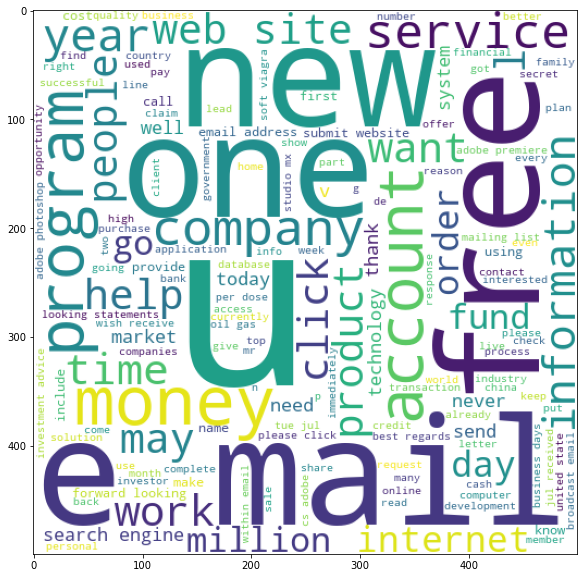

In [20]:
spam_wc = wc.generate(data[data['spam'] == 1]['processed_text'].str.cat(sep = ''))

plt.figure(figsize = (12,10))
plt.imshow(spam_wc)

# Wordcloud for non-spam emails

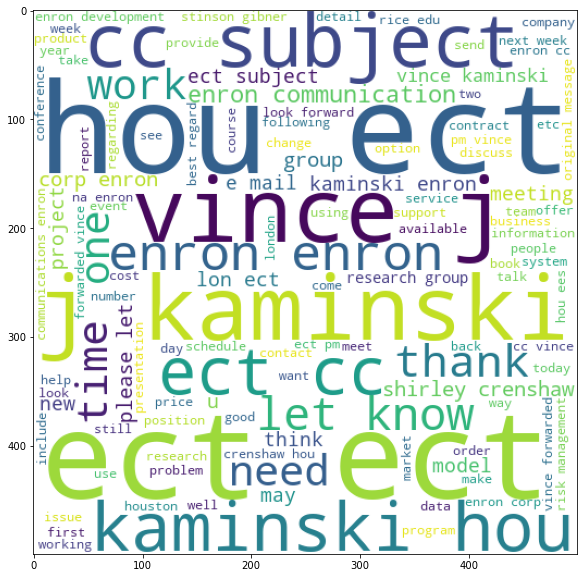

In [19]:
Non_spam_wc = wc.generate(data[data['spam'] == 0]['processed_text'].str.cat(sep = ''))

plt.figure(figsize = (12,10))
plt.imshow(Non_spam_wc)

# Train/Test/Validation split

In [21]:
X = data['processed_text']

y = data['spam']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.25, random_state = 50)

In [22]:
X_train_df = pd.DataFrame()

X_train_df['Email'] = X_train
X_train_df['Spam'] = y_train
X_train_df

,Email,Spam
5469,gas model chaim received number phone messages...,0
4315,backtesting different percentiles vlady enclos...,0
3452,year end performance feedback note receive mes...,0
693,neugierig content type text plain content tran...,1
3698,garp frank reviewed materials garp find inform...,0
...,...,...
1534,friend mine shirley please arrange phone inter...,0
5460,var cob nd aug hi vince waiting comment email ...,0
3831,willow pathstar evaluations please respond mik...,0
125,cool medz hello welcome medzonli decapitation ...,1


In [23]:
X_test_df = pd.DataFrame()

X_test_df['Email'] = X_test
X_test_df['Spam'] = y_test
X_test_df

,Email,Spam
1615,forwarded vince j kaminski hou ect gould aaron...,0
611,new love tabs shop visit llcensed online drags...,1
4247,additional e mail addresses vince three new st...,0
3662,synfuel option valuation lenny believe must do...,0
3849,missing prc information vince following inform...,0
...,...,...
2533,congratulations dear vince soooo gland see get...,0
4515,additional attachments vince forgot attach fin...,0
4223,visit enron professor nalin kulatilaka boston ...,0
4011,subscription renewal barbara yes would like re...,0


In [24]:
X_val_df = pd.DataFrame()

X_val_df['Email'] = X_val
X_val_df['Spam'] = y_val
X_val_df

,Email,Spam
2074,fyi enron best hi vince spoke molly mcgee hr g...,0
4264,fw gmm mar jeff newsletter addressed wide audi...,0
5586,russian investment climate multimedia playback...,0
627,professional advertising dear projecthoneypot ...,1
3773,supply rebound beginning update cera outlook u...,0
...,...,...
5656,new eprm speakers vince thanks much help helen...,0
3808,technical writer position note confirm cease r...,0
2692,calling pm pm hi vince thank allowing call spe...,0
2720,fw london wish list oops sent previous email a...,0


In [25]:
X_train_df.to_csv('train.csv',index=False)
X_test_df.to_csv('test.csv',index=False)
X_val_df.to_csv('validation.csv',index=False)